In [1]:
import pandas as pd
import numpy as np
import sys
import os

import matplotlib.pyplot as plt


#Enables imports from src directory in notebooks
sys.path.insert(0, os.path.abspath('../src'))
#Auto update imports when python files in src is updated
%load_ext autoreload
%autoreload 2

In [2]:
soilqdf = pd.read_csv('E:/Universitetet i Agder/Mikkel Andreas Kvande - kornmo-data-files/raw-data/soil-data/jordsmonn.csv', dtype=str)
#Columns to consider: JR SIGN, JR_DRIFT (0.9), JR_KLASSE (0.75)
columns_to_keep = ['JORDKVALIT', 'HELLING', 'JR_BEGRENS', 'JR_DREN', 'JR_DRENAAK', 'JR_KLASSE', 'JR_TORK', 'JR_SIGN', 'ORGANISK', 'TEKSTUR', 'VANNLAGR', 'EROSJ_FLATE']
soilqdf = soilqdf.filter(columns_to_keep)
soilqdf = soilqdf.dropna()




#soilqdf = pd.read_csv('E:/Universitetet i Agder/Mikkel Andreas Kvande - kornmo-data-files/raw-data/soil-data/soilquality_refined.csv')
#columns_to_drop = ['Unnamed: 0', 'kartleggingsmetode', 'verifiseringsdato', 'malemetode', 'noyaktighet']
#soilqdf.drop(columns_to_drop, axis=1, inplace=True)

soilqdf.head()

,JORDKVALIT,HELLING,JR_BEGRENS,JR_DREN,JR_DRENAAK,JR_KLASSE,JR_TORK,JR_SIGN,ORGANISK,TEKSTUR,VANNLAGR,EROSJ_FLATE
0,1,6,1,2,1,2,3,2d,6,5,3,2
1,1,3,1,1,1,2,4,2d,6,4,3,2
2,1,3,1,1,1,2,3,2d,6,4,3,2
3,1,7,1,2,1,2,4,2d,6,4,3,3
4,1,5,1,2,1,2,3,2d,6,4,3,2


In [3]:
def one_hot_encode(column):
    values = list(soilqdf[column].unique())
    soilqdf[column] = soilqdf[column].apply(lambda x: values.index(x))


In [4]:
soilqdf['JR_SIGN'] = soilqdf['JR_SIGN'].apply(lambda x: x[1:])

one_hot_encode('JORDKVALIT')
one_hot_encode('JR_SIGN')

soilqdf = soilqdf.astype(float)

print(soilqdf['JR_SIGN'])




0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
628948    7.0
628949    7.0
628950    4.0
628951    0.0
628952    9.0
Name: JR_SIGN, Length: 595086, dtype: float64


In [5]:
keys = list(soilqdf.keys())
quality = list(soilqdf['JORDKVALIT'])
for key in keys:
    if key == 'JORDKVALIT':
        continue
    similarity = 0
    for i, value in enumerate(list(soilqdf[key])):
        if (value == quality[i]) or (value == quality[i] + 1) or (value == quality[i] - 1):
            similarity += 1
    print(f'Similarity for {key}: {similarity / len(list(soilqdf[key]))}')

Similarity for HELLING: 0.08996682832397335
Similarity for JR_BEGRENS: 0.3927919662032042
Similarity for JR_DREN: 0.33865525319029516
Similarity for JR_DRENAAK: 0.352362515670004
Similarity for JR_KLASSE: 0.22240987017002584
Similarity for JR_TORK: 0.21495716585501928
Similarity for JR_SIGN: 0.48580541299912955
Similarity for ORGANISK: 0.034805053387241505
Similarity for TEKSTUR: 0.15127057265672525
Similarity for VANNLAGR: 0.07667799276071022
Similarity for EROSJ_FLATE: 0.6770483593967931


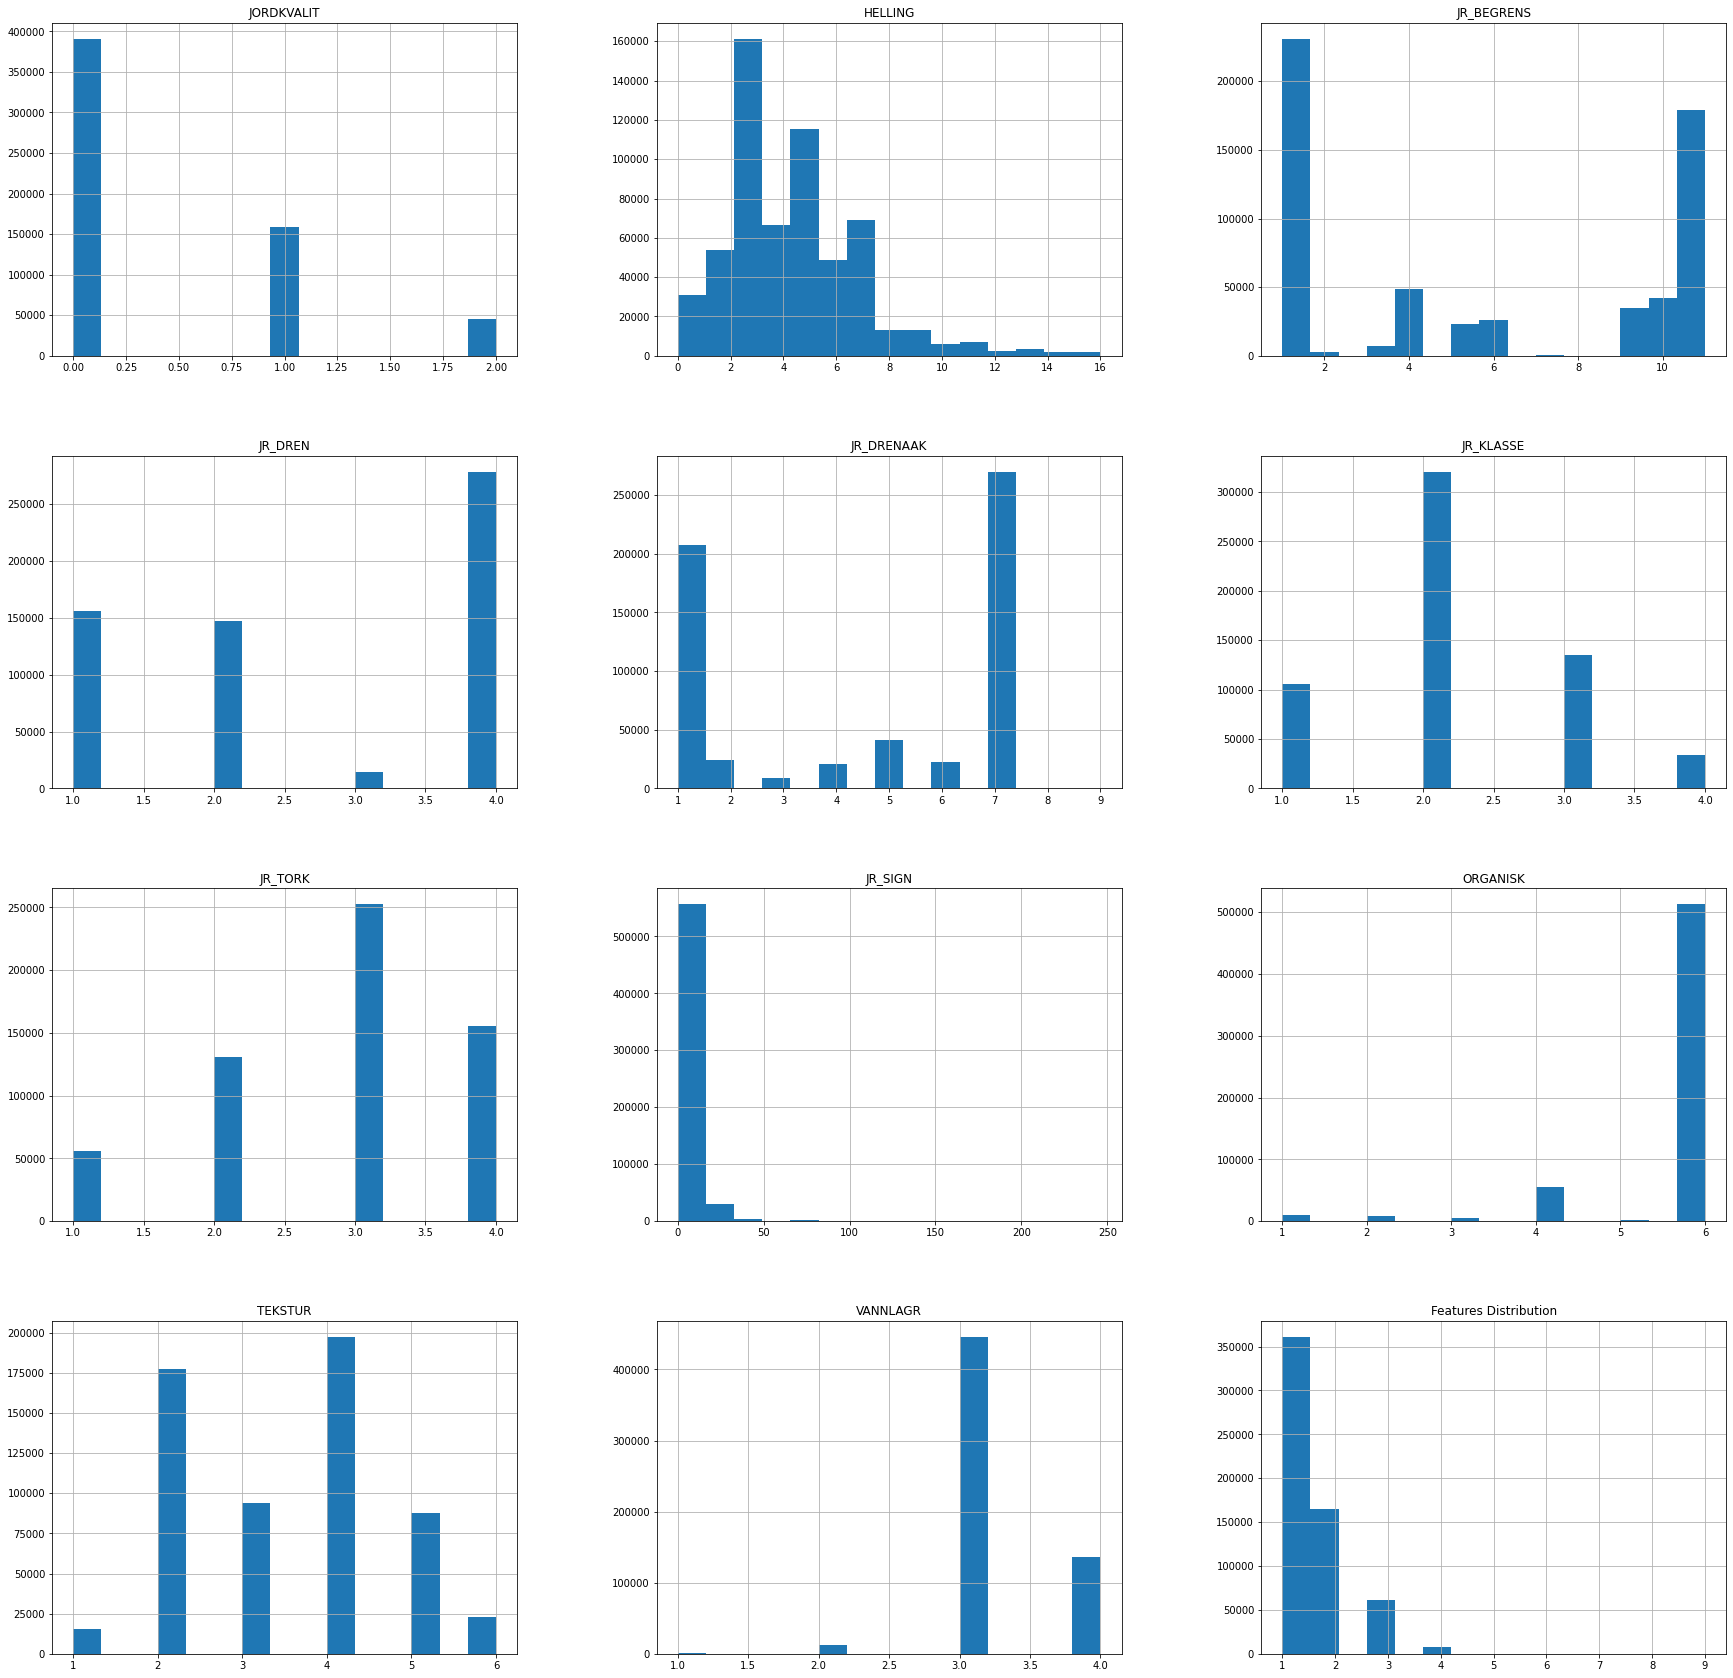

In [6]:
soilqdf.hist(figsize=(30, 30),bins = 15)
plt.title("Features Distribution")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

y = soilqdf['JORDKVALIT']
X = soilqdf.drop(columns=['JORDKVALIT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
#print(y_train)
X.head()

,HELLING,JR_BEGRENS,JR_DREN,JR_DRENAAK,JR_KLASSE,JR_TORK,JR_SIGN,ORGANISK,TEKSTUR,VANNLAGR,EROSJ_FLATE
0,6.0,1.0,2.0,1.0,2.0,3.0,0.0,6.0,5.0,3.0,2.0
1,3.0,1.0,1.0,1.0,2.0,4.0,0.0,6.0,4.0,3.0,2.0
2,3.0,1.0,1.0,1.0,2.0,3.0,0.0,6.0,4.0,3.0,2.0
3,7.0,1.0,2.0,1.0,2.0,4.0,0.0,6.0,4.0,3.0,3.0
4,5.0,1.0,2.0,1.0,2.0,3.0,0.0,6.0,4.0,3.0,2.0


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)


[[ 0.58645173  1.18891449  1.00763304 ... -1.12959651 -0.44175527
  -0.71395716]
 [ 0.16759082 -1.0836013  -0.54065882 ...  1.3050832  -0.44175527
  -0.71395716]
 [-1.08899191 -1.0836013  -1.31480474 ...  0.4935233   1.72620904
  -0.71395716]
 ...
 [-1.08899191 -1.0836013  -1.31480474 ...  0.4935233   1.72620904
  -0.71395716]
 [-0.670131   -1.0836013  -1.31480474 ...  0.4935233  -0.44175527
  -0.71395716]
 [ 0.16759082  1.18891449  1.00763304 ... -1.12959651 -0.44175527
  -0.71395716]]


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight


In [10]:
#class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#class_weights = dict(enumerate(class_weights))

In [11]:
classifier = Sequential()

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.6))
#classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.6))

classifier.add(Dense(3, activation='softmax'))

classifier.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

callback = EarlyStopping(monitor='loss', patience=3)
history = classifier.fit(X_train, y_train, batch_size=32, epochs = 100, verbose = 1, shuffle=True, callbacks=[callback], validation_data=(X_test, y_test))

score, acc = classifier.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)



Epoch 1/100
14878/14878 [==============================] - 35s 2ms/step - loss: 0.1192 - accuracy: 0.9670 - val_loss: 0.0558 - val_accuracy: 0.9879
Epoch 2/100
14878/14878 [==============================] - 27s 2ms/step - loss: 0.0680 - accuracy: 0.9850 - val_loss: 0.0517 - val_accuracy: 0.9880
Epoch 3/100
14878/14878 [==============================] - 30s 2ms/step - loss: 0.0633 - accuracy: 0.9865 - val_loss: 0.0485 - val_accuracy: 0.9907
Epoch 4/100
14878/14878 [==============================] - 30s 2ms/step - loss: 0.0609 - accuracy: 0.9872 - val_loss: 0.0463 - val_accuracy: 0.9916
Epoch 5/100
14878/14878 [==============================] - 30s 2ms/step - loss: 0.0596 - accuracy: 0.9877 - val_loss: 0.0457 - val_accuracy: 0.9916
Epoch 6/100
14878/14878 [==============================] - 30s 2ms/step - loss: 0.0591 - accuracy: 0.9878 - val_loss: 0.0458 - val_accuracy: 0.9916
Epoch 7/100
14878/14878 [==============================] - 29s 2ms/step - loss: 0.0584 - accuracy: 0.9881 - val_

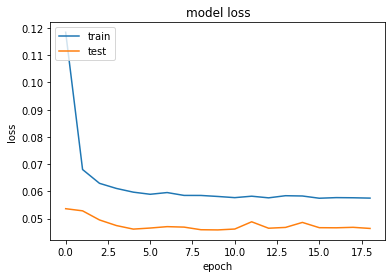

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test)
y_test = [np.argmax(t) for t in y_test]
y_pred = [np.argmax(t) for t in y_pred]

cm = confusion_matrix(y_test, y_pred)


Text(0.5, 15.0, 'Predicted label')

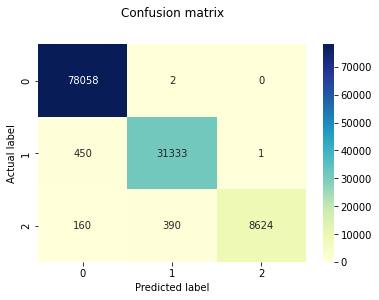

In [ ]:
import seaborn as sns

p = sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     78060
           1       0.99      0.99      0.99     31784
           2       1.00      0.94      0.97      9174

    accuracy                           0.99    119018
   macro avg       0.99      0.98      0.98    119018
weighted avg       0.99      0.99      0.99    119018

